In [1]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [48]:
import functions
import numpy as np
import scipy.interpolate as inter

# Instability based on galactic shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

 $A = 0.5 ( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} ) $


Посчитаем критическое значение плотности газа для каждого пикселя

In [3]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
H_alpha = np.load('./data/H_alpha.npy')

In [4]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [5]:
#G = 4.32
#Sigma_crit = np.zeros(dist_kpc.shape)
#max_dist = dist_kpc.max()
#for i, row in enumerate(dist_kpc):
#    for j, col in enumerate(dist_kpc[0]):
#        if (dist_kpc[i][j] <= 1/3 * max_dist):
#            beta = 0.75
#        elif ((dist_kpc[i][j] > 1/3 * max_dist) and (dist_kpc[i][j] <= 2/3 * max_dist)):
#            beta = 0.5
#        elif ((dist_kpc[i][j] > 2/3 * max_dist) and (dist_kpc[i][j] <= max_dist)):  
#            beta = 0.1
#        A = 0.5 * velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] * (1-beta) 
#        sigma_g = sigma_HI[i][j]/1000.
#  
#        Sigma_crit[i][j] = 2.5 * A * sigma_g / np.pi / G

In [6]:
#Inst_field = np.zeros(dist_kpc.shape)

#for i, row in enumerate(dist_kpc):
#    for j, col in enumerate(dist_kpc[0]):
#        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
#        if(Sigma_gas > Sigma_crit[i][j]):
#            Inst_field[i][j] = 1
#        else: 
#            Inst_field[i][j] = 0

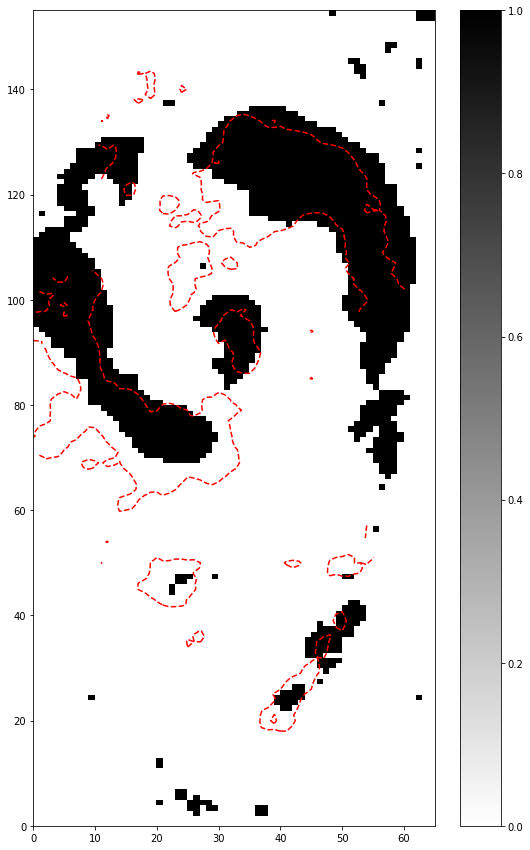

In [31]:
#H_alpha = np.load('./data/H_alpha.npy')
#X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
#fig = plt.figure(figsize=[9,15])
#CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
#quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
#plt.colorbar()

In [32]:
#Inst_field1 = np.zeros(dist_kpc.shape)

#for i, row in enumerate(dist_kpc):
#    for j, col in enumerate(dist_kpc[0]):
#        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
#        Inst_field1[i][j] = Sigma_crit[i][j] / Sigma_gas 

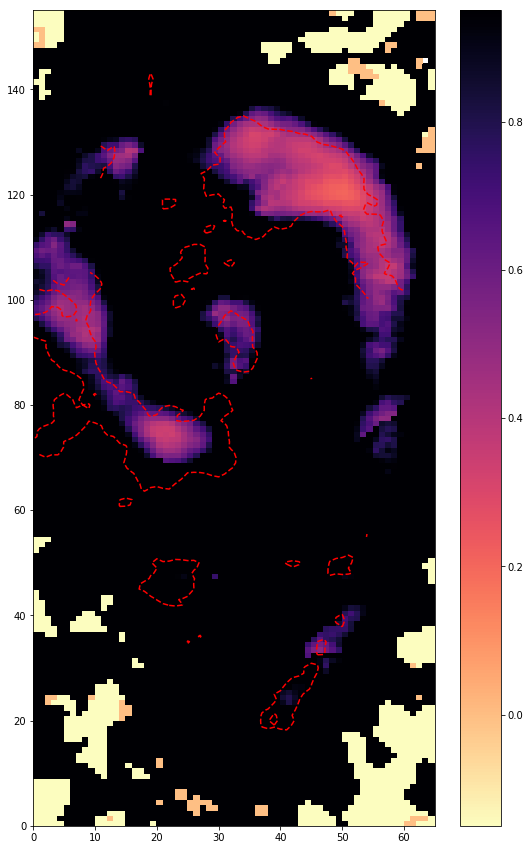

In [33]:
#H_alpha = np.load('./data/H_alpha.npy')
#X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
#fig = plt.figure(figsize=[9,15])
#CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
#quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='magma_r')
#quadmesh.set_clim(vmin=-0.15, vmax = 0.95)
#plt.colorbar()

In [34]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 3.3 * A * sigma_g / np.pi / G

In [35]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

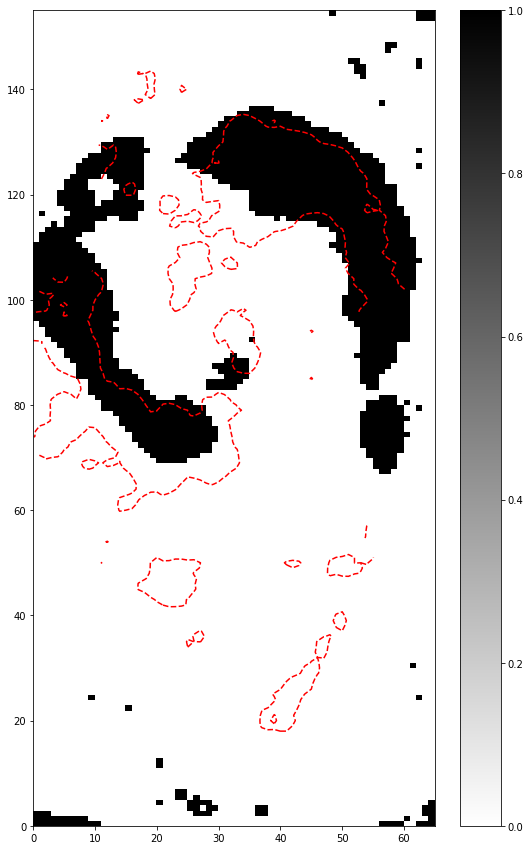

In [36]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [38]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 
        
np.save('./data/shear_method.npy', shear_method)        

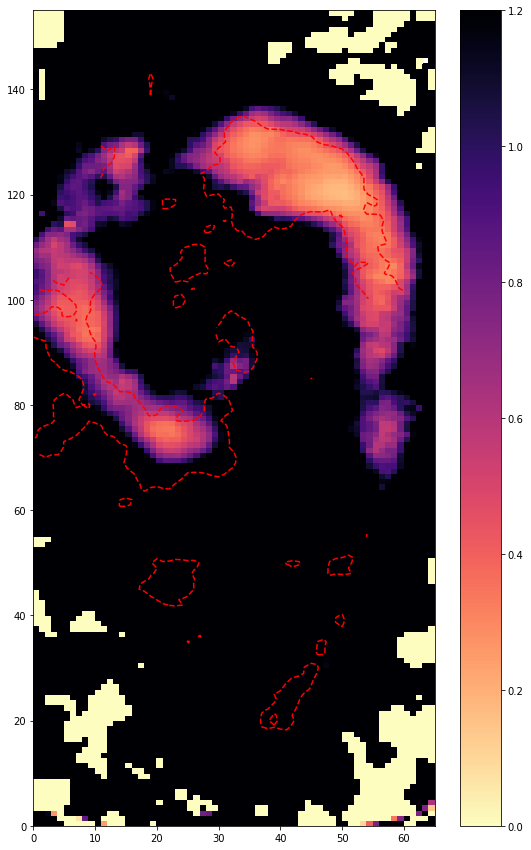

In [57]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()

In [14]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = A * sigma_g / np.pi / G # без умножения на alpha_A
    
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 
      


       

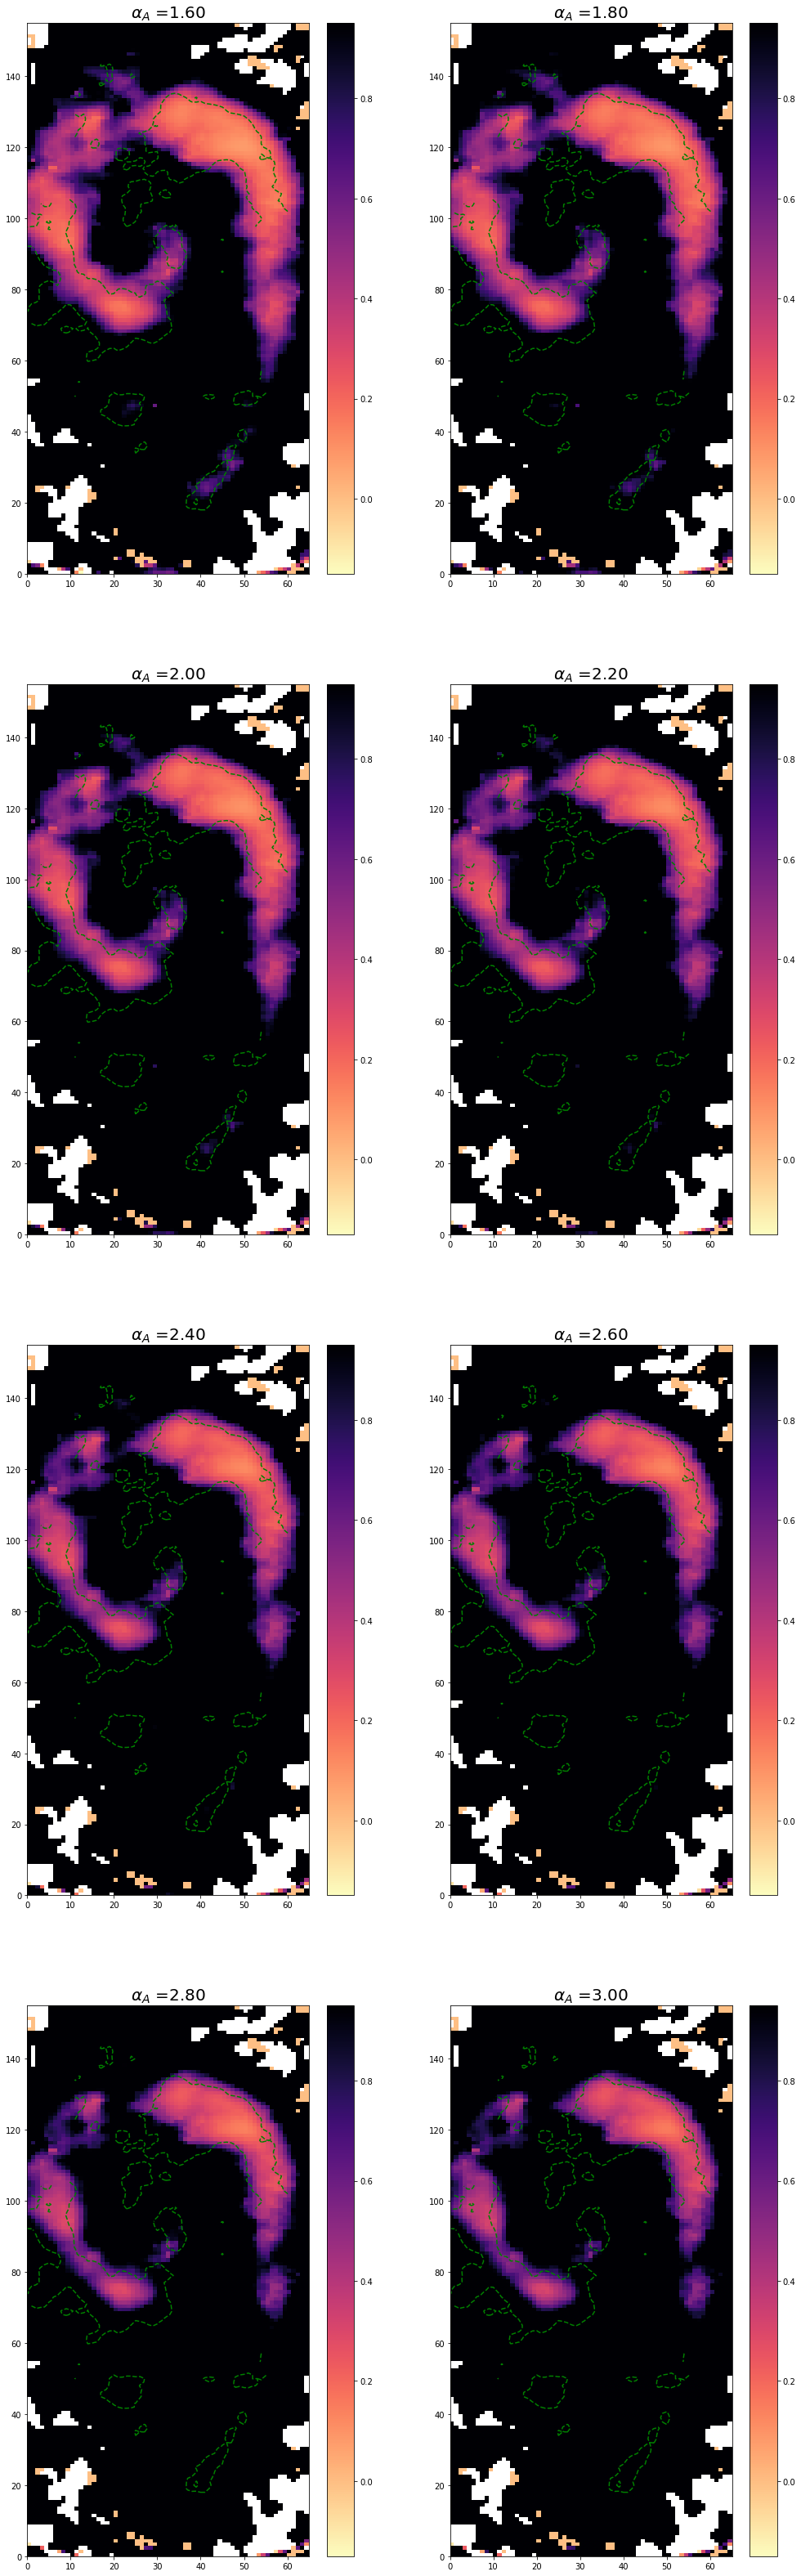

In [16]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 57])
for i,alpha_A in enumerate(np.linspace(1.6, 3.0, 8)):
    plt.subplot(4,2,i+1)
    CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='green')
    quadmesh = plt.pcolormesh(X, Y, shear_method*alpha_A, cmap='magma_r')
    quadmesh.set_clim(vmin=-0.15, vmax = 0.95)
    quadmesh.cmap.set_under('white')
    plt.colorbar()
    plt.title(r'$\alpha_A$ ='+str("%.2f" % alpha_A), fontsize=20)


Построим график зависимости A(R)  

In [52]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
A = []
R = np.array(np.linspace(0.1,10.,100))

for dist in R:
    A.append(0.5 * (velocity_approx(dist) / dist - velocity_approx.deriv()(dist)))
 

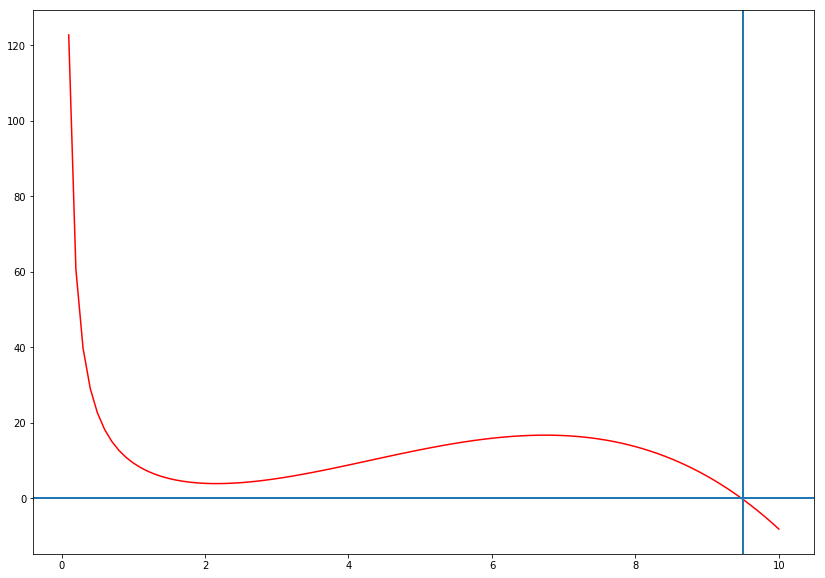

In [53]:
plt.figure(figsize=[14,10])
plt.plot(R,A, color='red')
plt.axhline(y = 0., lw = 2)
plt.axvline(x = 9.5, lw = 2)

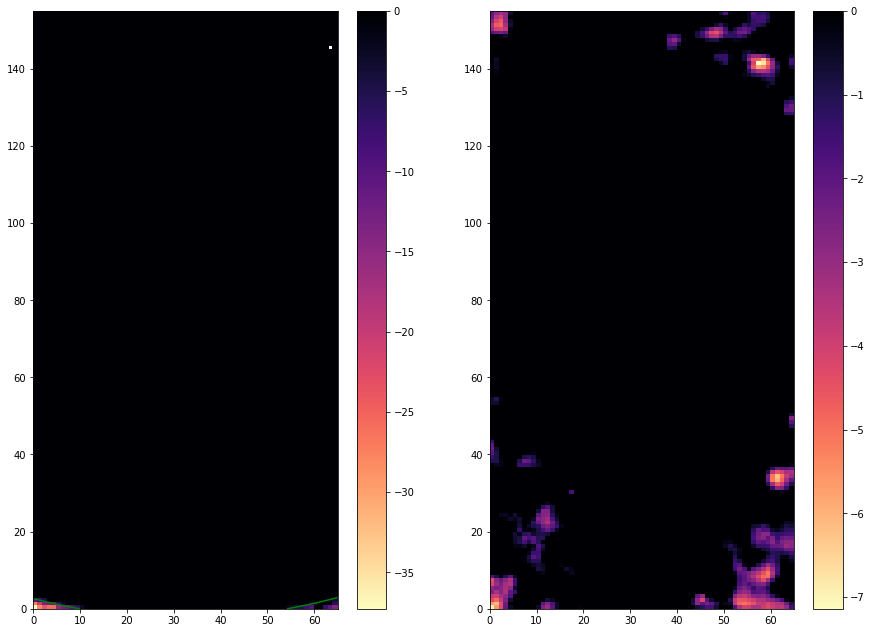

In [60]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[15,11])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, dist_kpc, levels=[0,9.5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Sigma_crit, cmap='magma_r')
quadmesh.set_clim(vmax = 0.)
plt.colorbar()
plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, 1.36*(Sigma_HI + Sigma_H2), cmap='magma_r')
quadmesh.set_clim(vmax = 0.)
plt.colorbar()